Gradient Descent Results:
Minimizer: [0. 0.]
Minimum Value: 9.0
Iterations: 1
Time Taken (s): 0.0

Newton's Method Results:
Minimizer: [0. 0.]
Minimum Value: 9.0
Iterations: 1
Time Taken (s): 0.0


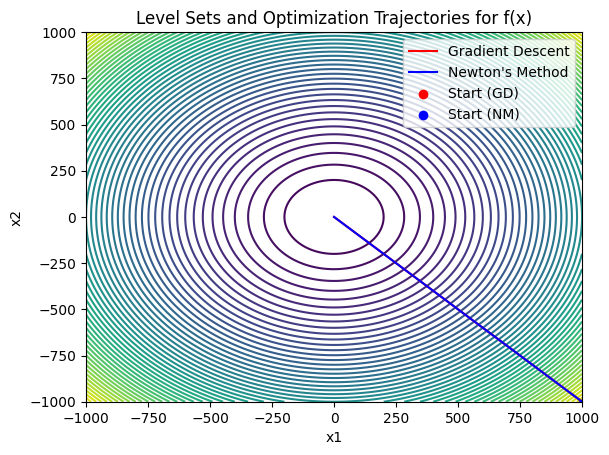

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time


def f(x):
    return x[0]**2 + x[1]**2 + 9

def grad_f(x):
    return np.array([2 * x[0], 2 * x[1]])

def hessian_f():
    return np.array([[2, 0], [0, 2]])


def gradient_descent_exact_line_search(f, grad_f, x0, tau=1e-15):
    x = x0
    path = [x]
    iterations = 0
    start_time = time.time()
    
    while np.linalg.norm(grad_f(x)) > tau:
        grad = grad_f(x)
        alpha = np.dot(grad, grad) / (2 * np.dot(grad, grad))  # Exact line search for quadratic f
        x = x - alpha * grad
        path.append(x)
        iterations += 1

    end_time = time.time()
    return x, f(x), iterations, end_time - start_time, path


def newtons_method(f, grad_f, hessian_f, x0, tau=1e-15):
    x = x0
    path = [x]
    iterations = 0
    start_time = time.time()
    hessian_inv = np.linalg.inv(hessian_f())

    while np.linalg.norm(grad_f(x)) > tau:
        grad = grad_f(x)
        x = x - np.dot(hessian_inv, grad)
        path.append(x)
        iterations += 1

    end_time = time.time()
    return x, f(x), iterations, end_time - start_time, path


x0 = np.array([1000, -1000])


gd_result = gradient_descent_exact_line_search(f, grad_f, x0)
print("Gradient Descent Results:")
print("Minimizer:", gd_result[0])
print("Minimum Value:", gd_result[1])
print("Iterations:", gd_result[2])
print("Time Taken (s):", gd_result[3])


nm_result = newtons_method(f, grad_f, hessian_f, x0)
print("\nNewton's Method Results:")
print("Minimizer:", nm_result[0])
print("Minimum Value:", nm_result[1])
print("Iterations:", nm_result[2])
print("Time Taken (s):", nm_result[3])


x = np.linspace(-1000, 1000, 400)
y = np.linspace(-1000, 1000, 400)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 + 9

plt.contour(X, Y, Z, levels=50, cmap='viridis')
gd_path = np.array(gd_result[4])
nm_path = np.array(nm_result[4])

plt.plot(gd_path[:, 0], gd_path[:, 1], 'r-', label='Gradient Descent')
plt.plot(nm_path[:, 0], nm_path[:, 1], 'b-', label='Newton\'s Method')
plt.scatter(gd_path[0, 0], gd_path[0, 1], c='red', label='Start (GD)')
plt.scatter(nm_path[0, 0], nm_path[0, 1], c='blue', label='Start (NM)')
plt.legend()
plt.title("Level Sets and Optimization Trajectories for f(x)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time


In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt


def P(i):
    periodic_values = [1/4, 1/16, 1/256, 1/64]
    return periodic_values[(i - 1) % 4]


def g(x):
    return sum((1 / P(i+1)) * (x[i] - (i+1)**2)**2 for i in range(len(x)))

def grad_g(x):
    return np.array([2 * (x[i] - (i+1)**2) / P(i+1) for i in range(len(x))])

def hessian_g(n):
    return np.diag([2 / P(i+1) for i in range(n)]) + 1e-8 * np.eye(n)


def gradient_descent_g(f, grad_f, x0, tau=1e-15, max_iters=1000):
    x = x0
    iterations = 0
    path = [x]
    start_time = time.time()

    while np.linalg.norm(grad_f(x)) > tau and iterations < max_iters:
        grad = grad_f(x)
        scaled_grad = grad / (np.linalg.norm(grad) + 1e-8)  # To Prevent division by zero
        step_size = np.dot(grad, grad) / (2 * sum(grad**2 / np.diag(hessian_g(len(x)))))
        alpha = min(max(step_size, 1e-8), 1.0)  
        x = x - alpha * scaled_grad
        if np.any(np.isnan(x)):
            raise ValueError(f"NaN encountered in x: {x}")
        path.append(x)
        iterations += 1

    end_time = time.time()
    return x, f(x), iterations, end_time - start_time, path

# Newton's Method
def newtons_method_g(f, grad_f, hessian_f, x0, tau=1e-15, max_iters=100):
    x = x0
    iterations = 0
    path = [x]
    start_time = time.time()

    while np.linalg.norm(grad_f(x)) > tau and iterations < max_iters:
        grad = grad_f(x)
        hessian = hessian_f(len(x))
        step = np.linalg.solve(hessian, grad)  # Solves Hx = -grad
        x = x - step
        if np.any(np.isnan(x)):
            raise ValueError(f"NaN encountered in x: {x}")
        path.append(x)
        iterations += 1

    end_time = time.time()
    return x, f(x), iterations, end_time - start_time, path

# Test for various n
for n in [2, 20, 200, 2000, 5000, 10000]:
    print(f"Running for n = {n}...")
    x0 = np.arange(1, n + 1)
    try:
        gd_result = gradient_descent_g(g, grad_g, x0)
        newton_result = newtons_method_g(g, grad_g, hessian_g, x0)
        print(f"Gradient Descent: {gd_result[1]:.6f}, Newton's Method: {newton_result[1]:.6f}")
    except Exception as e:
        print(f"Error for n = {n}: {e}")


Running for n = 2...
Gradient Descent: 2.559999, Newton's Method: 0.000000
Running for n = 20...
Gradient Descent: 38414.805696, Newton's Method: 0.000000
Running for n = 200...
Gradient Descent: 5455847635671.355469, Newton's Method: 0.000000
Running for n = 2000...
Gradient Descent: 544817790138945152.000000, Newton's Method: 0.000000
Running for n = 5000...
Gradient Descent: 53157587120902004736.000000, Newton's Method: 0.000000
Running for n = 10000...


KeyboardInterrupt: 

i am getting nan values using Gradient Descent with the exact line search